## Roulette Simulation and Profit Analysis

Roulette is a popular casino game played with a wheel that has numbered slots colored red, black, or green. In American roulette, the wheel has 38 slots: 18 red slots, 18 black slots, and 2 green slots labeled "0" and "00."

Players can place various types of bets, including betting on whether the outcome will be a red or black slot. In this exercise, we focus on a simple bet: betting on black.

<div style="text-align: center;">
    <img src="additional_files\image.png" alt="Roulette Wheel" style="width: 30%;">
</div>

If you place a bet on black and the outcome is indeed black, you win and double your money. However, if the outcome is red or green, you lose the amount you bet. For example, if you bet 1 dollar on black and win, you gain 1 dollar. If you lose, you forfeit your 1-dollar bet.

Since there are three colors, the probability of landing on black is not exactly $\frac{1}{2}$, but rather: $\frac{18}{38} = \frac{9}{19}$

### Import Required Libraries

In [ ]:
import math
import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### 1. function that simulates this game for 𝑁 rounds

In [ ]:
def roulette_simulation(N):
    total_earned = 0
    for _ in range(N):
        number = random.randint(1, 38)
        if number <= 18:
            total_earned += 1
        else:
            total_earned -= 1
            
    return total_earned


In [3]:
N = 1000
earnings = roulette_simulation(N)
print(earnings)

-66


### 2. Monte Carlo simulation

Results for N = 10:
  Sample Mean:                     -0.534
  Sample SE:                        0.00998
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.323
  Sample SE:                        0.01575
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.182
  Sample SE:                        0.03150
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.554
  Sample SE:                        0.09984
--------------------------------------------------


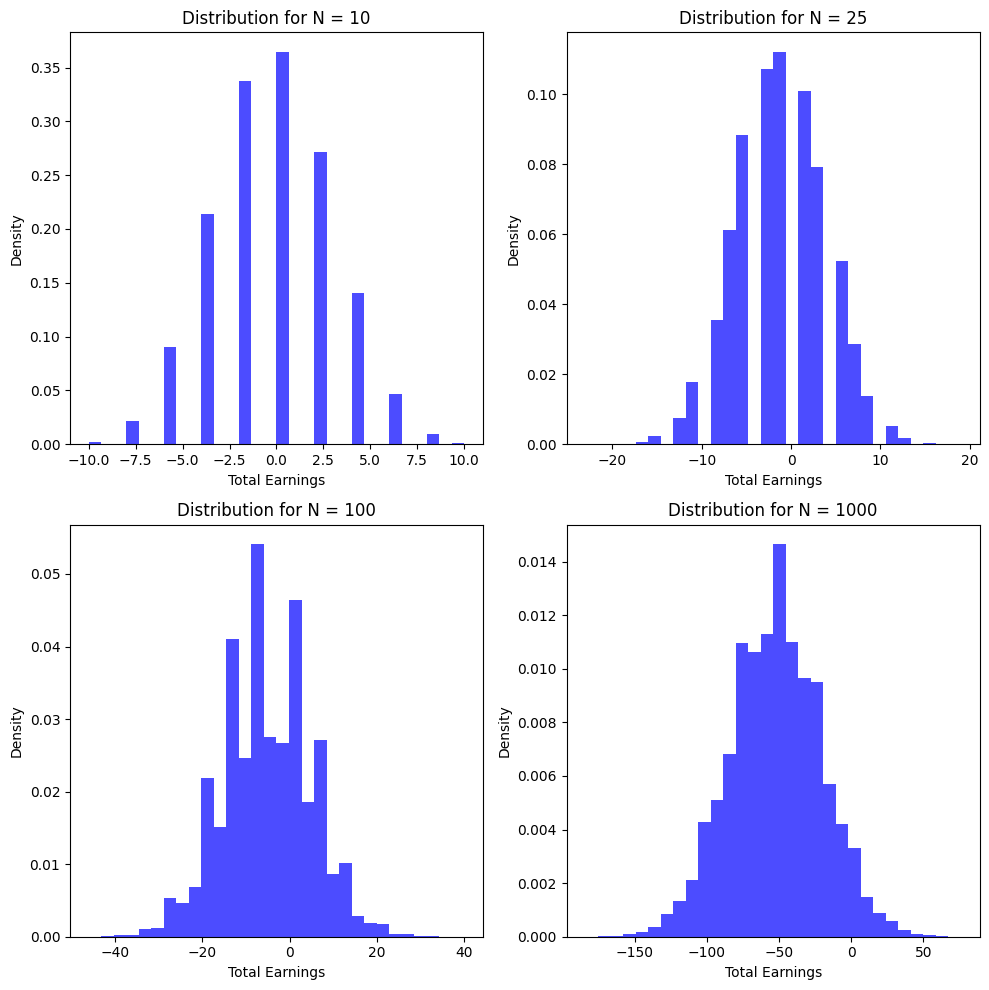

In [ ]:
num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 3. previous simulation but for the average winnings

Results for N = 10:
  Sample Mean:                     -0.054
  Sample SE:                        0.00100
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -0.054
  Sample SE:                        0.00063
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -0.053
  Sample SE:                        0.00032
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -0.053
  Sample SE:                        0.00010
--------------------------------------------------


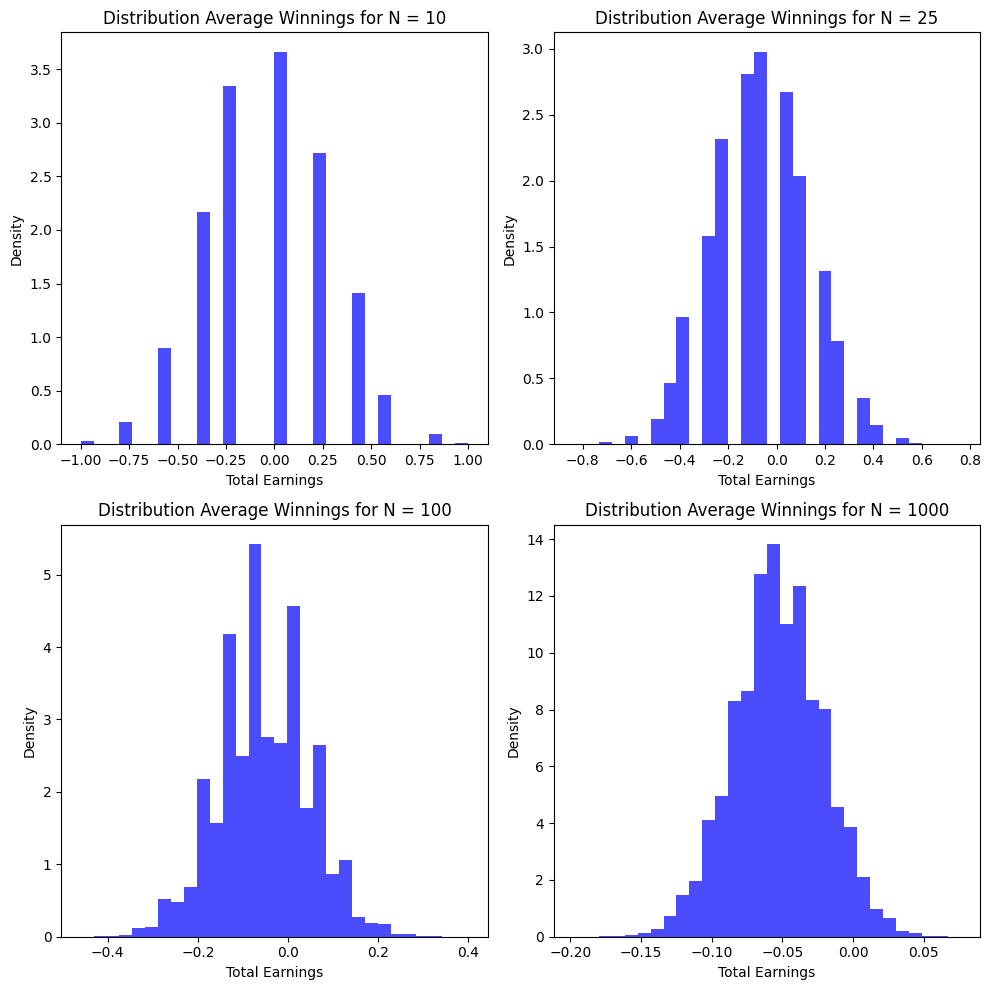

In [ ]:
num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    
    results = [roulette_simulation(N_values[i])/N_values[i] for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution Average Winnings for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 4. compare theoretical values with Monte Carlo simulation results

In [6]:
num_simulations = 100000
N_values = [10, 25, 100, 1000]

Expected_value_single = -1 / 19  # E(X) = (18/38)*1 + (20/38)*(-1)
Variance_single = 360 / 361  # Var(X) = 1 - (-1/19)^2

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    theoretical_mean = N_values[i] * Expected_value_single
    theoretical_std = np.sqrt(N_values[i] * Variance_single)
    theoretical_se = theoretical_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Theoretical Mean:                {theoretical_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print(f"  Theoretical SE:                   {theoretical_se:.5f}")
    print("-" * 50)

Results for N = 10:
  Sample Mean:                     -0.535
  Theoretical Mean:                -0.526
  Sample SE:                        0.01000
  Theoretical SE:                   0.00999
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.312
  Theoretical Mean:                -1.316
  Sample SE:                        0.01575
  Theoretical SE:                   0.01579
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.245
  Theoretical Mean:                -5.263
  Sample SE:                        0.03150
  Theoretical SE:                   0.03158
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.725
  Theoretical Mean:                -52.632
  Sample SE:                        0.09983
  Theoretical SE:                   0.09986
--------------------------------------------------


### 5. CLT Approximation vs Monte Carlo Estimate

For $N = 25$:

- *Mean of $S_N$*:  
  $$
    \mu = E[S_N] = N \times E[X_i] = 25 \times \left(-\frac{1}{19}\right) = -\frac{25}{19}
  $$

- *Standard Deviation of $S_N$*:  
  $$
    \sigma = \sqrt{N \times \mathrm{Var}(X_i)} = \sqrt{25 \times \frac{360}{361}} = 5 \sqrt{\frac{360}{361}}
  $$

We want the probability that **the casino loses money**, which means:

$$
P(\text{casino loses}) = P(S_N > 0).
$$

By the Central Limit Theorem, for moderate $N$, $S_N$ is approximately normal with mean $\mu$ and standard deviation $\sigma$.

$$
P(S_N > 0) 
= P\left(\frac{S_N - \mu}{\sigma} > \frac{0 - \mu}{\sigma}\right) 
= 1 - \Phi\!\Bigl(\frac{0 - \mu}{\sigma}\Bigr)
$$

where $\Phi$ is the standard normal CDF.

In [ ]:
mu = N * Expected_value_single
sigma = math.sqrt(N * Variance_single)

z_value = (0 - mu) / sigma
clt_probability = 1 - norm.cdf(z_value)

print(f"CLT Approximation: {clt_probability:.5f}")

def monte_carlo_estimate(N, num_simulations):
    count_casino_loses = 0
    for _ in range(num_simulations):
        s = roulette_simulation(N)
        if s > 0:
            count_casino_loses += 1
    return count_casino_loses / num_simulations

mc_probability = monte_carlo_estimate(N, num_simulations)

print(f"Monte Carlo Estimate: {mc_probability:.5f}")

CLT Approximation: 0.04779
Monte Carlo Estimate: 0.04412


### 6. Plot the probability that the casino loses money

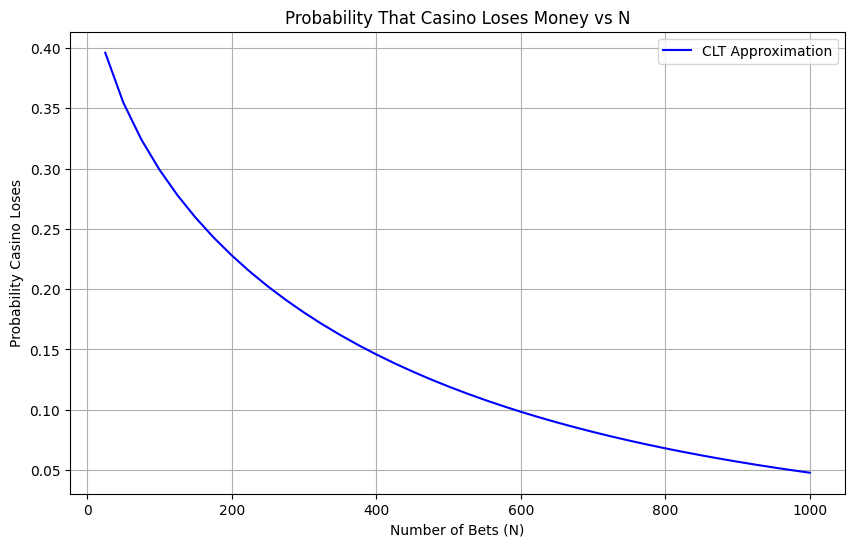

In [ ]:
N_values = np.arange(25, 1001, 25)  # Values of N from 25 to 1000 in steps of 25

clt_probabilities = []
mc_probabilities = []

for N in N_values:
    mu = N * Expected_value_single
    sigma = math.sqrt(N * Variance_single)
    z_value = (0 - mu) / sigma
    clt_prob = 1 - norm.cdf(z_value)
    clt_probabilities.append(clt_prob)
    
    ### uncomment if you want to see Monte Carlo Estimate ###
    # mc_prob = monte_carlo_estimate(N, num_simulations)
    # mc_probabilities.append(mc_prob)

plt.figure(figsize=(10, 6))
plt.plot(N_values, clt_probabilities, label="CLT Approximation", color='blue')
### uncomment if you want to see Monte Carlo Estimate ###
# plt.plot(N_values, mc_probabilities, label="Monte Carlo Estimate", color='red')
plt.xlabel("Number of Bets (N)")
plt.ylabel("Probability Casino Loses")
plt.title("Probability That Casino Loses Money vs N")
plt.legend()
plt.grid()
plt.show()

## Predicting the Outcome of the 2016 USA Presidential Election

In this exercise, we aim to predict the result of the 2016 U.S. presidential election by
analyzing polling data and aggregating results.

In [9]:
import pandas as pd
import numpy as np

First, we will read the dataset into a dataframe.

In [10]:
path = "./2016-general-election-trump-vs-clinton.csv"
df = pd.read_csv(path)
df.shape

(1522, 17)

In [11]:
df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
8,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1167.0,Likely Voters - independent,Internet,44.0,31.0,9.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
9,Lucid/The Times-Picayune,2016-11-04,2016-11-06,2016-11-07T15:43:26Z,931.0,Likely Voters,Internet,40.0,45.0,2.0,7.0,http://elections.huffingtonpost.com/pollster/p...,https://luc.id/2016-presidential-tracker/,Nonpartisan,NaN,NaN,1


Then, we will clean the data by removing any rows with missing value in "Number of Observations".

In [12]:
df = df.dropna(subset=["Number of Observations"], axis=0)
df.reset_index(drop=True, inplace=True)

In [13]:
df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
2,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
3,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
4,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1167.0,Likely Voters - independent,Internet,44.0,31.0,9.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
6,Lucid/The Times-Picayune,2016-11-04,2016-11-06,2016-11-07T15:43:26Z,931.0,Likely Voters,Internet,40.0,45.0,2.0,7.0,http://elections.huffingtonpost.com/pollster/p...,https://luc.id/2016-presidential-tracker/,Nonpartisan,NaN,NaN,1
7,Bloomberg/Selzer,2016-11-04,2016-11-06,2016-11-07T12:18:47Z,799.0,Likely Voters,Live Phone,43.0,46.0,5.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://assets.bwbx.io/documents/users/iqjWHBF...,Nonpartisan,NaN,"If the general election were held today, and t...",1
8,Bloomberg/Selzer,2016-11-04,2016-11-06,2016-11-07T12:18:47Z,799.0,Likely Voters,Live Phone,41.0,44.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://assets.bwbx.io/documents/users/iqjWHBF...,Nonpartisan,NaN,"If the general election were held today, and t...",2
9,ABC/Post,2016-11-03,2016-11-06,2016-11-07T20:19:38Z,2220.0,Likely Voters,Live Phone,43.0,47.0,4.0,1.0,http://elections.huffingtonpost.com/pollster/p...,https://www.washingtonpost.com/news/the-fix/wp...,Nonpartisan,NaN,NaN,1


In [14]:
df.shape

(1013, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1013 non-null   object 
 1   Start Date              1013 non-null   object 
 2   End Date                1013 non-null   object 
 3   Entry Date/Time (ET)    1013 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1013 non-null   object 
 6   Mode                    1013 non-null   object 
 7   Trump                   1013 non-null   float64
 8   Clinton                 1013 non-null   float64
 9   Other                   640 non-null    float64
 10  Undecided               979 non-null    float64
 11  Pollster URL            1013 non-null   object 
 12  Source URL              1013 non-null   object 
 13  Partisan                1013 non-null   object 
 14  Affiliation             44 non-null     

### Q1 - Computing 95% confidence interval for p

A confidence interval is a range of values, derived from sample statistics, that is likely to contain the true population parameter (like the mean) with a certain level of confidence.

The 95% confidence interval means that if we take many samples and compute a confidence interval for each sample, about 95% of those intervals would contain the true population mean. The formula for 95% confidence interval is:

$$CI = \hat{p} \pm 1.96 \times \sqrt{\frac{\hat{p} \times (1 - \hat{p})}{n}}$$

where $\hat{p}$ is the sample proportion, $n$ is the sample size, and 1.96 is the z-value for 95% confidence interval.

In [16]:
df['Democrat_voters'] = (df['Clinton'] / 100.0) * df['Number of Observations']
N = df['Number of Observations'].sum()
p_hat = df['Democrat_voters'].sum() / N
SE = np.sqrt(p_hat * (1 - p_hat) / N)
error_range = 1.96 * SE
lower_bound = p_hat - error_range
upper_bound = p_hat + error_range
print(f"Supporting proportion for democrat candidate (p_hat for Clinton supporters): {p_hat:.5f}")
print(f"95% error value: {error_range:.5f}")
print(f"95% confidence interval for p: [{lower_bound:.5f}, {upper_bound:.5f}]")

Supporting proportion for democrat candidate (p_hat for Clinton supporters): 0.45612
95% error value: 0.00070
95% confidence interval for p: [0.45542, 0.45682]


### Q2 - Monte Carlo simulation

Here, we have repeatedly taken samples from a known bernoulli distribution and calculate the mean of the samples. Then we calculate the confidence interval for each sample in each iteration (like in question 1) and check that if the real p is in that interval or not. After doing this process for 100000 times, we will wee that approximately 95% of the confidence intervals contain the real p.

In [17]:
num_iterations = 100000
p = 0.47
N = 30
correct_num = 0
for _ in range(num_iterations):
    temp = np.random.binomial(1, p, N)
    p_hat = temp.mean()
    SE = np.sqrt(p_hat * (1 - p_hat) / N)
    error_range = 1.96 * SE
    if p >= p_hat - error_range and p <= p_hat + error_range:
        correct_num += 1
print(f"Percentage of the outcomes covered by 95% confidence intervals: {correct_num / num_iterations}")

Percentage of the outcomes covered by 95% confidence intervals: 0.93059


The reason that the percentage is about 93% is that the number of samples (N) can be a bit more. For example if N is 40, the percentage becomes very near to 95%.

### Q3 - Loading dataset with desired attributes

In [18]:
temp_df = pd.read_csv(path)
df2 = temp_df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']]
df2 = df2.dropna(subset=['Number of Observations'], axis=0)
df2.reset_index(drop=True, inplace=True)

In [19]:
df2.head()

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
1,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone
2,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet
3,6.0,90.0,YouGov/Economist,2016-11-04,1392.0,Internet
4,84.0,4.0,YouGov/Economist,2016-11-04,1110.0,Internet


### Q4 - Create time-series plot

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from tabulate import tabulate
from scipy.stats import norm

In [21]:
df2['Start Date'] = pd.to_datetime(df2['Start Date'])
df2 = df2.sort_values(by='Start Date')
df2.reset_index(drop=True, inplace=True)

In [22]:
df2.head()

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone
1,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone
2,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
3,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet
4,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet


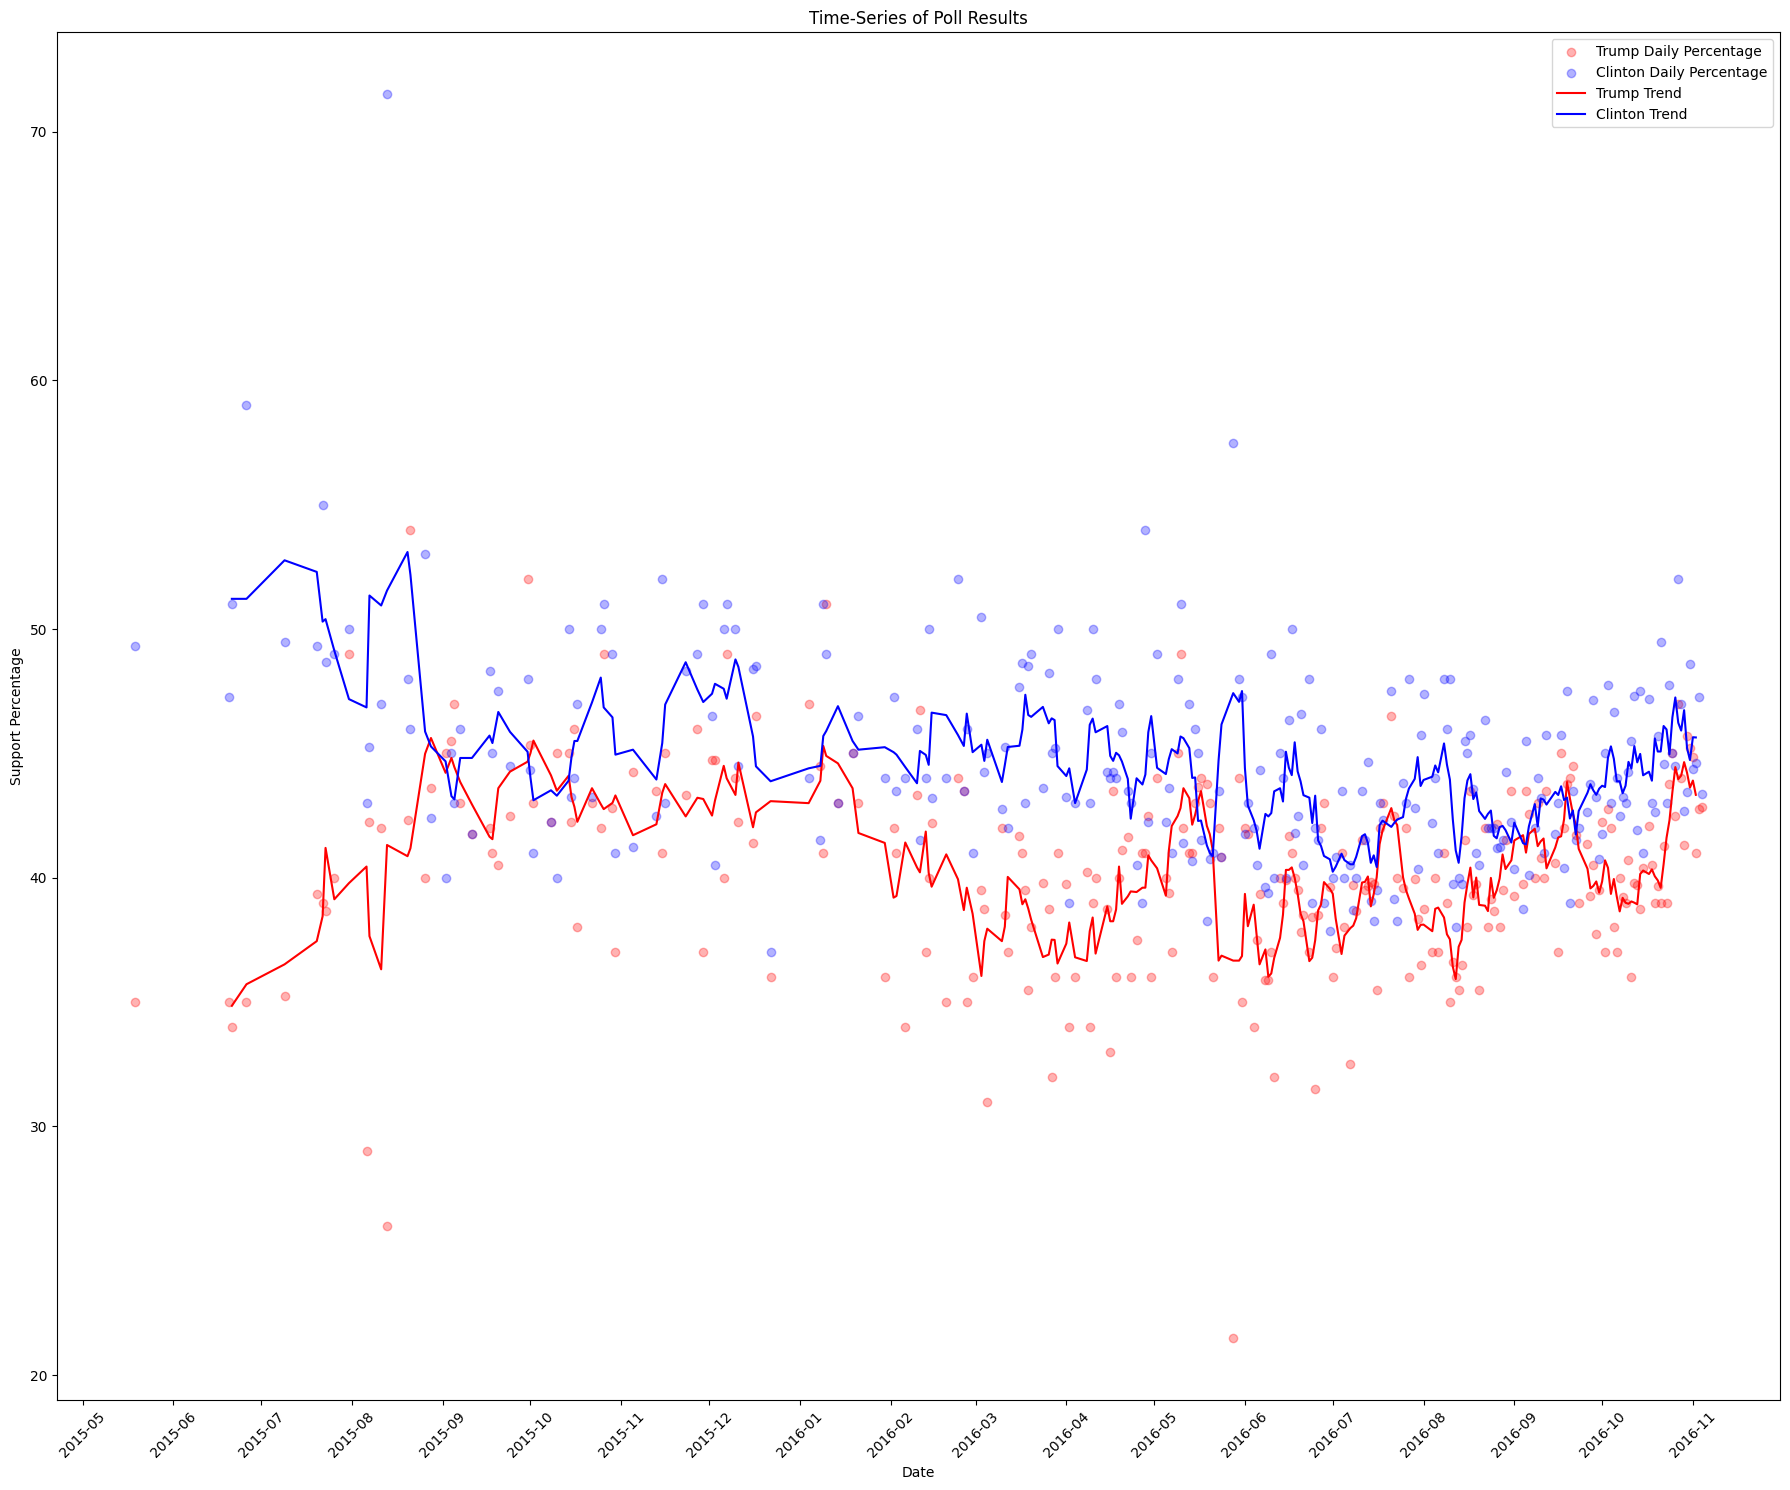

In [23]:
df_temp = df2.groupby('Start Date', as_index=False)[['Trump', 'Clinton']].mean()
df_temp['Trump Trend'] = df_temp['Trump'].rolling(window=5, center=True).mean()
df_temp['Clinton Trend'] = df_temp['Clinton'].rolling(window=5, center=True).mean()
plt.figure(figsize=(18,15))  

plt.scatter(df_temp['Start Date'], df_temp['Trump'],
            label='Trump Daily Percentage', alpha=0.3, color='red')
plt.scatter(df_temp['Start Date'], df_temp['Clinton'],
            label='Clinton Daily Percentage', alpha=0.3, color='blue')

plt.plot(df_temp['Start Date'], df_temp['Trump Trend'],
         label='Trump Trend', color='red')
plt.plot(df_temp['Start Date'], df_temp['Clinton Trend'],
         label='Clinton Trend', color='blue')

plt.xlabel('Date')
plt.ylabel('Support Percentage')
plt.title('Time-Series of Poll Results')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Because the plot becomes not too dirty, I have placed the dates with 1 month intervals and also draw the trend line for each candidate with some intervals and not connecting every consecutive points to each other. As we can see from the trend lines, Clinton has a higher trend than Trump in most of the times.

### Q5 - Calculate total number of voters

In [24]:
total_votes = df2['Number of Observations'].sum()
print("Total number of votes: ", int(total_votes))

Total number of votes:  1940931


### Q6 - Calculate the estimated proportion of voters for each candidate

For this question, I have calculated the estimated proportion of voters for each candidate by dividing the number of votes for each candidate by the total number of voters.

In [25]:
df2['Trump voters'] = (df2['Trump'] / 100.0) * df2['Number of Observations']
df2['Clinton voters'] = (df2['Clinton'] / 100.0) * df2['Number of Observations']
total_trump = df2['Trump voters'].sum()
total_clinton = df2['Clinton voters'].sum()
trump_percentage = total_trump / total_votes
clinton_percentage = total_clinton / total_votes

table_data = [
    ["Trump",   f"{int((total_trump)):,}",   f"{trump_percentage * 100:.2f}%"],
    ["Clinton", f"{int((total_clinton)):,}", f"{clinton_percentage * 100:.2f}%"]
]
table_headers = ["Candidate", "Total Votes", "Percentage"]
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_outline"))

╒═════════════╤═══════════════╤══════════════╕
│ Candidate   │ Total Votes   │ Percentage   │
╞═════════════╪═══════════════╪══════════════╡
│ Trump       │ 787,694       │ 40.58%       │
│ Clinton     │ 885,299       │ 45.61%       │
╘═════════════╧═══════════════╧══════════════╛


### Q7 - Compute the 95% confidence interval for each candidate

Here, I have calculated the 95% confidence interval for each candidate.

In [26]:
def calc_95(p_hat, N):
    SE = np.sqrt(p_hat * (1 - p_hat) / N)
    error_range = 1.96 * SE
    return p_hat - error_range, p_hat + error_range

lower_trump, upper_trump = calc_95(trump_percentage, total_votes)
lower_clinton, upper_clinton = calc_95(clinton_percentage, total_votes)
print(f"95% confidence interval for Trump support proportions: [{lower_trump:.5f}, {upper_trump:.5f}]")
print(f"95% confidence interval for Clinton support proportions: [{lower_clinton:.5f}, {upper_clinton:.5f}]")

95% confidence interval for Trump support proportions: [0.40514, 0.40652]
95% confidence interval for Clinton support proportions: [0.45542, 0.45682]


### Q8 - Estimate spread and conduct a hypothesis test

The spread is ${p_{Clinton} - p_{Trump}}$ and the null hypothesis is that the spread is 0, meaning that the difference between the voters of the two candidates is 0. The alternative hypothesis is that the spread is not 0. I have conducted a two-side hypothesis test with a significance level of 0.05.

In [27]:
d_hat = (2*clinton_percentage) - 1
SE_d = 2 * np.sqrt(clinton_percentage *(1 - clinton_percentage) / total_votes)
error_range = 1.96 * SE_d
lower_bound = d_hat - error_range
upper_bound = d_hat + error_range
print(f"The value of d_hat: {d_hat:.5f}")
print(f"The 95% confidence interval for the spread: [{lower_bound:.5f}, {upper_bound:.5f}]")

The value of d_hat: -0.08776
The 95% confidence interval for the spread: [-0.08916, -0.08636]


Based on the value of ${d_{hat}}$ and the confidence interval that are negative, we can see that Trump is leading the election according to the poll data by approximately 8.7%.

In [28]:
Z = (d_hat - 0) / SE_d
p_value = 2 * (1 - norm.cdf(abs(Z)))
print(f"Z-score for the spread: {Z:.4f}")
print(f"p-value for the spread: {p_value}")

Z-score for the spread: -122.7361
p-value for the spread: 0.0


As we can see, because ${d_{hat}}$ is negative and low (about -0.87) and also the standard deviation is much lower than the magnitude of ${d_{hat}}$ (because of the large number of smaples(N)), the Z-score becomes a very large negative number and hence the p-value is very low (almost 0). So, we can reject the null hypothesis that d is 0 and say that Trump is leading the election according to the poll data.

## Drug Safety Test

### 1. load csv file

In [29]:
import pandas as pd

df = pd.read_csv('drug_safety.csv')
df.head()
display(df)

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


### 2. Drop samples containing NaN

In [30]:
df_cleaned = df.dropna()

### 3. Basic Statistics
Here are basic statistics for numeric columns. mean, std, min, max, Q1, Q2, Q3

In [31]:
numeric_cols = ['age', 'week','wbc', 'rbc', 'num_effects']
summary_stats = df[numeric_cols].describe()
display(summary_stats.round(2))

,age,week,wbc,rbc,num_effects
count,16103.00,16103.00,9128.00,9127.00,16103.00
mean,64.12,7.74,7.34,4.67,0.10
std,8.78,6.94,2.00,0.46,0.32
min,39.00,0.00,1.80,2.10,0.00
25%,58.00,1.00,6.00,4.40,0.00
50%,65.00,4.00,7.10,4.70,0.00
75%,71.00,12.00,8.40,5.00,0.00
max,84.00,20.00,26.50,7.60,3.00


### 4. Drug Vs. Placebo

In [32]:
grouped = df.groupby('trx')

trx_stats = grouped[['wbc', 'rbc', 'num_effects']].agg(['mean', 'std', 'count', 'median'])
display(trx_stats.round(2))

wbc                      rbc                    num_effects        \
         mean   std count median  mean   std count median        mean   std   
trx                                                                           
Drug     7.33  2.01  6011    7.0  4.68  0.45  6011    4.7         0.1  0.33   
Placebo  7.36  1.97  3117    7.2  4.66  0.47  3116    4.7         0.1  0.32   

                       
         count median  
trx                    
Drug     10727    0.0  
Placebo   5376    0.0

### 5. Numeralize adverse_effects column

In [33]:
df['adverse_effects'] = df['adverse_effects'].astype(str)
df['adverse_effects'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})
display(df)
print('mean of numeralized adverse_effects:', df['adverse_effects'].mean())

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,0,0
1,62,male,Drug,1,NaN,NaN,0,0
2,62,male,Drug,12,5.6,5.0,0,0
3,62,male,Drug,16,NaN,NaN,0,0
4,62,male,Drug,2,6.6,5.1,0,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,1,1
16099,78,male,Placebo,2,7.5,4.9,0,0
16100,78,male,Placebo,20,NaN,NaN,1,1
16101,78,male,Placebo,4,6.4,4.8,0,0


mean of numeralized adverse_effects: 0.09538595292802583


### 6. Hypothesis Testing

in scipy.ttest_ind, <b>alternative</b> defines the alternative hypothesis. this argument accepts one of these three values: {‘two-sided’, ‘less’, ‘greater’}

- two-sided: means of distributions are unequal
- less: mean of distribution of the first sample is less than the second one
- greater: mean of distribution of first sample is greater than the second one

<b>equal_var</b> accepts a boolean value. If it's true, assumes that two samples have same variance and if it's false, assumes that variances are different. To determine the equal_var argument for each part, we use Levene's test. Levene's test checks whether two groups have equal variances. if p-value resulted from Levene's test is less than 0.05, reject $H_0$ ($H_0$ = variances are equal). Otherwise, $H_0$ is true. So we choose equal_val false if p-value of Levene's test is less than 0.05; else its true.

<b>significance level:</b> The significance level represents the probability of rejecting the null hypothesis when it is actually true. if significance level is 0.05, it means there is 5 percent chance of incorrectly rejecting $H_0$. 

In [34]:
trx_stats = grouped[['wbc', 'rbc', 'num_effects', 'adverse_effects']].agg(['mean', 'std', 'count'])
display(trx_stats.round(4))

wbc                   rbc               num_effects          \
           mean     std count    mean     std count        mean     std   
trx                                                                       
Drug     7.3305  2.0089  6011  4.6791  0.4550  6011      0.1023  0.3261   
Placebo  7.3600  1.9729  3117  4.6605  0.4651  3116      0.1003  0.3172   

               adverse_effects                 
         count            mean     std  count  
trx                                            
Drug     10727          0.0955  0.2939  10727  
Placebo   5376          0.0952  0.2936   5376

- First drop Nan values for each column seperately:

In [35]:
drug_wbc = df[(df['trx'] == 'Drug') & (df['wbc'].notna())]
placebo_wbc = df[(df['trx'] == 'Placebo') & (df['wbc'].notna())]

drug_rbc = df[(df['trx'] == 'Drug') & (df['rbc'].notna())]
placebo_rbc = df[(df['trx'] == 'Placebo') & (df['rbc'].notna())]

drug_num_effects = df[(df['trx'] == 'Drug') & (df['num_effects'].notna())]
placebo_num_effects = df[(df['trx'] == 'Placebo') & (df['num_effects'].notna())]

drug_adverse_effects = df[(df['trx'] == 'Drug') & (df['adverse_effects'].notna())]
placebo_adverse_effects = df[(df['trx'] == 'Placebo') & (df['adverse_effects'].notna())]

- Perform Levene's test

In [36]:
from scipy import stats

_, p_wbc_levene = stats.levene(drug_wbc["wbc"], placebo_wbc["wbc"])
_, p_rbc_levene = stats.levene(drug_rbc["rbc"], placebo_rbc["rbc"])
_, p_num_effects_levene = stats.levene(drug_num_effects["num_effects"], placebo_num_effects["num_effects"])
_, p_adverse_levene = stats.levene(drug_adverse_effects["adverse_effects"], placebo_adverse_effects["adverse_effects"])

wbc_equal_var = p_wbc_levene >= 0.05
rbc_equal_var = p_rbc_levene >= 0.05
num_effects_equal_var = p_num_effects_levene >= 0.05
adverse_effects_equal_var = p_adverse_levene >= 0.05

##### two-sided alternative hypothesis: 

$H_0$: there is no significant difference between mean of those metrics

In [37]:
_, p_value_wbc = stats.ttest_ind(drug_wbc['wbc'], placebo_wbc['wbc'], equal_var=wbc_equal_var, alternative='two-sided')
_, p_value_rbc = stats.ttest_ind(drug_rbc['rbc'], placebo_rbc['rbc'], equal_var=rbc_equal_var, alternative='two-sided')
_, p_value_num_effects = stats.ttest_ind(drug_num_effects['num_effects'], placebo_num_effects['num_effects'], equal_var=num_effects_equal_var, alternative='two-sided')
_, p_value_adverse_effects = stats.ttest_ind(drug_adverse_effects['adverse_effects'], placebo_adverse_effects['adverse_effects'], equal_var=adverse_effects_equal_var, alternative='two-sided')

print(f"WBC p-value: {p_value_wbc:.4f}")
print(f"RBC p-value: {p_value_rbc:.4f}")
print(f"num_effects p-value: {p_value_num_effects:.4f}")
print(f"adverse_effects p-value: {p_value_adverse_effects:.4f}")

WBC p-value: 0.5023
RBC p-value: 0.0663
num_effects p-value: 0.7105
adverse_effects p-value: 0.9639


<table cellpadding="8">
  <thead>
    <tr>
      <th>Metric</th>
      <th>p-value</th>
      <th>α=0.05 Result</th>
      <th>α=0.1 Result</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean WBC</td>
      <td>0.5023</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean RBC</td>
      <td>0.0663</td>
      <td>Reject</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Mean Num Effects</td>
      <td>0.7105</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean Adverse Effects</td>
      <td>0.9639</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
  </tbody>
</table>



ttest rejects $H_0$ for RBC: Mean of rbc for drug and placebo groups have significant difference. 

##### greater:

$H_0$: mean of that metric for drug, is less than its mean for placebo 

In [38]:
_, p_value_wbc = stats.ttest_ind(drug_wbc['wbc'], placebo_wbc['wbc'], equal_var=wbc_equal_var, alternative='greater')
_, p_value_rbc = stats.ttest_ind(drug_rbc['rbc'], placebo_rbc['rbc'], equal_var=rbc_equal_var, alternative='greater')
_, p_value_num_effects = stats.ttest_ind(drug_num_effects['num_effects'], placebo_num_effects['num_effects'], equal_var=num_effects_equal_var, alternative='greater')
_, p_value_adverse_effects = stats.ttest_ind(drug_adverse_effects['adverse_effects'], placebo_adverse_effects['adverse_effects'], equal_var=adverse_effects_equal_var, alternative='greater')

print(f"WBC p-value: {p_value_wbc:.4f}")
print(f"RBC p-value: {p_value_rbc:.4f}")
print(f"num_effects p-value: {p_value_num_effects:.4f}")
print(f"adverse_effects p-value: {p_value_adverse_effects:.4f}")

WBC p-value: 0.7488
RBC p-value: 0.0331
num_effects p-value: 0.3552
adverse_effects p-value: 0.4820


<table cellpadding="8">
  <thead>
    <tr>
      <th>Metric</th>
      <th>p-value</th>
      <th>α=0.05 Result</th>
      <th>α=0.1 Result</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean WBC</td>
      <td>0.7488</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean RBC</td>
      <td>0.0331</td>
      <td>Reject</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Mean Num Effects</td>
      <td>0.3552</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean Adverse Effects</td>
      <td>0.4820</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
  </tbody>
</table>

##### less:
$H_0$: mean of that metric for drug, is more than its mean for placebo 

In [39]:
_, p_value_wbc = stats.ttest_ind(drug_wbc['wbc'], placebo_wbc['wbc'], equal_var=wbc_equal_var, alternative='less')
_, p_value_rbc = stats.ttest_ind(drug_rbc['rbc'], placebo_rbc['rbc'], equal_var=rbc_equal_var, alternative='less')
_, p_value_num_effects = stats.ttest_ind(drug_num_effects['num_effects'], placebo_num_effects['num_effects'], equal_var=num_effects_equal_var, alternative='less')
_, p_value_adverse_effects = stats.ttest_ind(drug_adverse_effects['adverse_effects'], placebo_adverse_effects['adverse_effects'], equal_var=adverse_effects_equal_var, alternative='less')

print(f"WBC p-value: {p_value_wbc:.4f}")
print(f"RBC p-value: {p_value_rbc:.4f}")
print(f"num_effects p-value: {p_value_num_effects:.4f}")
print(f"adverse_effects p-value: {p_value_adverse_effects:.4f}")

WBC p-value: 0.2512
RBC p-value: 0.9669
num_effects p-value: 0.6448
adverse_effects p-value: 0.5180


<table cellpadding="8">
  <thead>
    <tr>
      <th>Metric</th>
      <th>p-value</th>
      <th>α=0.05 Result</th>
      <th>α=0.1 Result</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean WBC</td>
      <td>0.2512</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean RBC</td>
      <td>0.9669</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean Num Effects</td>
      <td>0.6448</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
    <tr>
      <td>Mean Adverse Effects</td>
      <td>0.5180</td>
      <td>Fail to Reject</td>
      <td>Fail to Reject</td>
    </tr>
  </tbody>
</table>

## Questions

The correct answer is:

2. To estimate the true average pressure of the pipeline and give ourselves some room for error in the estimate.

A 95% confidence interval is constructed to estimate the true mean of the population (the pipeline's pressure), not just the sample mean. if we repeatedly take samples and construct confidence intervals, about 95% of them would contain the true mean.

Other options:
- 1. This statement describes an interval around the sample mean, but confidence intervals estimates the population mean, not just the average of the sample.

- 3. A confidence interval does not describe where 95 out of 100 measurements will fall. instead, it estimates where the true population mean is likely to be.

- 4. This describes a prediction interval, not a confidence interval. A prediction interval predicts future observations, whereas a confidence interval estimates the mean.